# Project No. 1 (סעיפים א, ב, ג) DNN

### Loading libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score

### Extracting dataset

In [2]:
main_dir = 'C:\\Users\\dani1\\Documents\\chest_xray' # main dataset directory

train_dir = os.path.join(main_dir, 'train')

test_dir = os.path.join(main_dir, 'test')

val_dir = os.path.join(main_dir, 'val')

train_p_dir = os.path.join(train_dir, 'PNEUMONIA')

train_n_dir = os.path.join(train_dir, 'NORMAL')

test_p_dir = os.path.join(test_dir, 'PNEUMONIA')

test_n_dir = os.path.join(test_dir, 'NORMAL')

# Extracting all file names 
train_p_files = os.listdir(train_p_dir)
train_n_files = os.listdir(train_n_dir)
test_p_files = os.listdir(test_p_dir)
test_n_files = os.listdir(test_n_dir)

print("Total images in the training set: ", len(train_p_files+train_n_files))
print("Total images in the test set: ", len(test_p_files+test_n_files))

Total images in the training set:  5216
Total images in the test set:  624


### Preproccesing our dataset for DNN

In [3]:
# We will preprocess our data using ImageDataGenerator and flow_from_directory
# generate training, testing and validation batches 
batch_size = 64

data_generate_train = ImageDataGenerator(rescale=1./255, validation_split=0.1) 
data_generate_test = ImageDataGenerator(rescale=1./255)

train_batches = data_generate_train.flow_from_directory(train_dir, target_size=(224,224), color_mode='grayscale',
                                                          subset='training', batch_size=batch_size,
                                                          class_mode='binary', shuffle=True, seed=42)
validation_batches = data_generate_train.flow_from_directory(train_dir, target_size=(224,224), color_mode='grayscale',
                                                          subset='validation', batch_size=batch_size,
                                                          class_mode='binary', shuffle=True, seed=42)
test_data = data_generate_test.flow_from_directory(test_dir, target_size=(224,224), color_mode='grayscale',
                                                      class_mode='binary', shuffle=False, batch_size=batch_size)

# Class indices
print(f'Number of classes are: {train_batches.num_classes}')
print(f'The classes are represented as {train_batches.class_indices}')

# Image shape
print(f'Shape of training data: {train_batches.image_shape}')
print(f'Shape of validation data: {validation_batches.image_shape}')
print(f'Shape of test data: {test_data.image_shape}')

Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Number of classes are: 2
The classes are represented as {'NORMAL': 0, 'PNEUMONIA': 1}
Shape of training data: (224, 224, 1)
Shape of validation data: (224, 224, 1)
Shape of test data: (224, 224, 1)


In [12]:
# Just for checking how much images we have in test_batches from each class
count_Norm = 0
count_Sick = 0

for k in range(len(test_batches.classes)):
    if test_batches.classes[k] == 0:
        count_Norm += 1
    else:
        count_Sick += 1
print(count_Norm)
print(count_Sick)

234
390


### Building CNN model and training

In [5]:
model1 = Sequential(name='DNN')
model1.add(Flatten(input_shape=[224,224,1]))
model1.add(Dense(128, activation='relu', name='Dense1'))
model1.add(Dense(128, activation='relu', name='Dense2'))
model1.add(Dense(64, activation='relu', name='Dense3'))
model1.add(Dense(32, activation='relu', name='Dense4'))
model1.add(Dense(1, activation='sigmoid', name='Dense5'))

model1.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
Dense1 (Dense)               (None, 128)               6422656   
_________________________________________________________________
Dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
Dense3 (Dense)               (None, 64)                8256      
_________________________________________________________________
Dense4 (Dense)               (None, 32)                2080      
_________________________________________________________________
Dense5 (Dense)               (None, 1)                 33        
Total params: 6,449,537
Trainable params: 6,449,537
Non-trainable params: 0
_____________________________________________________

In [6]:
# Using lr = 1e-4, batch_size = 64
model1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])

epochs = 50 

trained_model1 = model1.fit(train_batches, validation_data=validation_batches, epochs=epochs, batch_size = batch_size)

Epoch 1/50
74/74 [==============================] - 49s 657ms/step - loss: 0.4750 - accuracy: 0.7887 - val_loss: 0.3981 - val_accuracy: 0.8157
Epoch 2/50
74/74 [==============================] - 50s 674ms/step - loss: 0.2598 - accuracy: 0.8976 - val_loss: 0.2321 - val_accuracy: 0.9002
Epoch 3/50
74/74 [==============================] - 101s 1s/step - loss: 0.2159 - accuracy: 0.9108 - val_loss: 0.2191 - val_accuracy: 0.9079
Epoch 4/50
74/74 [==============================] - 108s 1s/step - loss: 0.2031 - accuracy: 0.9176 - val_loss: 0.2328 - val_accuracy: 0.8983
Epoch 5/50
74/74 [==============================] - 90s 1s/step - loss: 0.1944 - accuracy: 0.9206 - val_loss: 0.2491 - val_accuracy: 0.8906
Epoch 6/50
74/74 [==============================] - 62s 843ms/step - loss: 0.1991 - accuracy: 0.9193 - val_loss: 0.2186 - val_accuracy: 0.9079
Epoch 7/50
74/74 [==============================] - 112s 2s/step - loss: 0.1871 - accuracy: 0.9233 - val_loss: 0.2208 - val_accuracy: 0.9040
Epoch 8/

### Evaluating results 

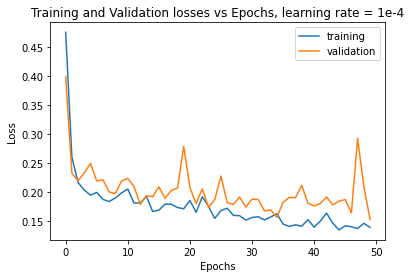

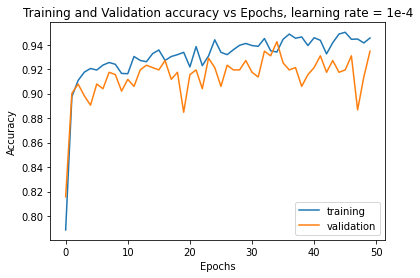

In [7]:
# plot training and validation Loss/Accuracy vs Epochs
plt.figure(1)
plt.plot(trained_model1.history['loss'])
plt.plot(trained_model1.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation losses vs Epochs, learning rate = 1e-4')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(2)
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation accuracy vs Epochs, learning rate = 1e-4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Changing Learning rate to 1e-5

In [5]:
model = Sequential(name='DNN1')
model.add(Flatten(input_shape=[224,224,1]))
model.add(Dense(128, activation='relu', name='Dense1'))
model.add(Dense(128, activation='relu', name='Dense2'))
model.add(Dense(64, activation='relu', name='Dense3'))
model.add(Dense(32, activation='relu', name='Dense4'))
model.add(Dense(1, activation='sigmoid', name='Dense5'))

model.summary()

Model: "DNN1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
Dense1 (Dense)               (None, 128)               6422656   
_________________________________________________________________
Dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
Dense3 (Dense)               (None, 64)                8256      
_________________________________________________________________
Dense4 (Dense)               (None, 32)                2080      
_________________________________________________________________
Dense5 (Dense)               (None, 1)                 33        
Total params: 6,449,537
Trainable params: 6,449,537
Non-trainable params: 0
____________________________________________________

In [7]:
# Using lr = 5e-6, batch_size = 64
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=5e-6), metrics=["accuracy"])

epochs = 50 

trained_model = model.fit(train_batches, validation_data=validation_batches, epochs=epochs, batch_size = batch_size)

Epoch 1/50
74/74 [==============================] - 49s 662ms/step - loss: 0.4960 - accuracy: 0.7527 - val_loss: 0.4396 - val_accuracy: 0.7831
Epoch 2/50
74/74 [==============================] - 41s 554ms/step - loss: 0.3700 - accuracy: 0.8458 - val_loss: 0.3608 - val_accuracy: 0.8426
Epoch 3/50
74/74 [==============================] - 41s 557ms/step - loss: 0.3056 - accuracy: 0.8854 - val_loss: 0.3036 - val_accuracy: 0.8906
Epoch 4/50
74/74 [==============================] - 41s 561ms/step - loss: 0.2692 - accuracy: 0.8995 - val_loss: 0.2927 - val_accuracy: 0.8944
Epoch 5/50
74/74 [==============================] - 42s 565ms/step - loss: 0.2464 - accuracy: 0.9059 - val_loss: 0.2661 - val_accuracy: 0.9021
Epoch 6/50
74/74 [==============================] - 42s 571ms/step - loss: 0.2329 - accuracy: 0.9110 - val_loss: 0.2650 - val_accuracy: 0.8791
Epoch 7/50
74/74 [==============================] - 42s 574ms/step - loss: 0.2264 - accuracy: 0.9127 - val_loss: 0.2488 - val_accuracy: 0.8983

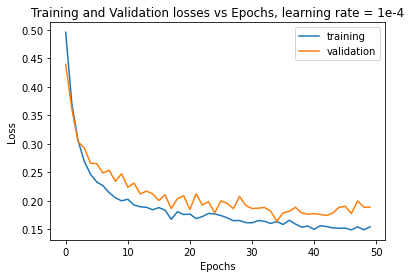

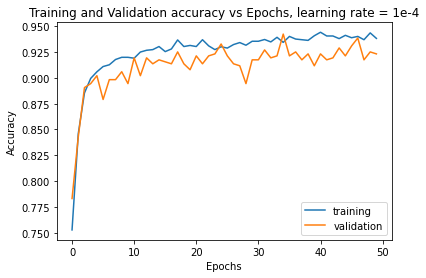

In [9]:
# plot training and validation Loss/Accuracy vs Epochs
plt.figure(1)
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation losses vs Epochs, learning rate = 1e-4')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(2)
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation accuracy vs Epochs, learning rate = 1e-4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Evaluating preformance

In [8]:
model.save('My_DNN1_lr5e-6_batchsize64.h5') # Save model

In [11]:
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test accuracy: {test_accuracy*100}%, Test loss: {test_loss}")

10/10 [==============================] - 3s 255ms/step - loss: 0.3943 - accuracy: 0.8205
Test accuracy: 82.05128312110901%, Test loss: 0.39430132508277893


In [5]:
loaded_model = tf.keras.models.load_model('My_DNN1_lr5e-6_batchsize64.h5')

In [11]:
predictions = loaded_model.predict(test_data) # Set of probabilites
y_pred = predictions > 0.5
y_true = test_data.classes # True labels

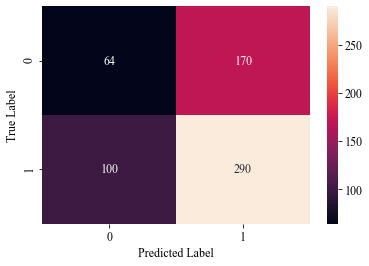

In [12]:
import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [34]:
Recall = "{:.2f}".format(recall_score(y_true, y_pred))
Precision = "{:.2f}".format(precision_score(y_true, y_pred))
print(f'Recall score is: {Recall}')
print(f'Precision score is: {Precision}')

Recall score is: 0.74
Precision score is: 0.63


In [5]:
keras.backend.clear_session() # Run before ___.fit command 